## Creating Structure or Streamlit Application

### Initializations

In [1]:
import speech_recognition as sr
from tensorflow.keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
model_lr = load_model('../data/model_l.hd/')

In [3]:
model_sr = load_model('../data/model_s.hd/')

In [4]:
import numpy as np
import spacy
from sklearn.base import BaseEstimator, TransformerMixin

class WordVectorTransformer(TransformerMixin,BaseEstimator):
    def __init__(self, model="en_trf_distilbertbaseuncased_lg"):    #put bert embeddings here
        self.model = model
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        nlp = spacy.load(self.model)
        return np.concatenate([nlp(doc).vector.reshape(1,-1) for doc in X])

In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [6]:
bertvect = WordVectorTransformer()

In [7]:
analyzer = SentimentIntensityAnalyzer()

In [15]:
def combine_predict(sentence):
    sentence = [[sentence]]

    preds = np.array([])
    s_input_model_l = np.array([bertvect.transform(i) for i in sentence]).reshape(-1,768,1)
    s_input_model_s = pd.DataFrame([analyzer.polarity_scores(i) for i in sentence])
    
    preds_l = model_lr.predict(s_input_model_l)
    preds_s = model_sr.predict(s_input_model_s)

    for i in preds_l:
        for j in preds_s:
            if abs(i - j) > 0.5:
                preds = np.append(preds,j)
            else:
                preds = np.append(preds,(0.7*i + 0.3*j))
    
            
    return preds[0]

### Direct Text Input

In [16]:
text_input = "I've been a little more tired today, and slightly sad for most of the day. It's been manageable so that's good. I don't feel as bad as I did yesterday, but I still want to feel better."

In [17]:
prediction_t = combine_predict(text_input)
print(f'YOU INPUTTED: {text_input}')
print(f'The model predicts a probabiliy of: {prediction_t}')

if prediction_t < 0.2:
    print('Your input is unlikely to be indicative of depression')
elif 0.2 <= prediction_t < 0.4:
    print('Your input is moderately unlikely to be indicative of depression')
elif 0.4 <= prediction_t < 0.6:
    print('Your input is moderately likely to be indicative of depression')
elif 0.6 <= prediction_t < 0.8:
    print('Your input is likely to be indicative of depression')
else:
    print('Your input is highly likely to be indicative of depression')

YOU INPUTTED: I've been a little more tired today, and slightly sad for most of the day. It's been manageable so that's good. I don't feel as bad as I did yesterday, but I still want to feel better.
The model predicts a probabiliy of: 0.5330100655555725
Your input is moderately likely to be indicative of depression


### Speech Recognition Input

In [12]:
def receive_audio():
    r = sr.Recognizer()
    with sr.Microphone() as source:
        audio = r.listen(source)

    try:
        # for testing purposes, we're just using the default API key
        # to use another API key, use `r.recognize_google(audio, key="GOOGLE_SPEECH_RECOGNITION_API_KEY")`
        # instead of `r.recognize_google(audio)`
        output = r.recognize_google(audio)
        #print(f'Model Prediction for Depression Probability: {combine_predict(speech_output)}')
    except sr.UnknownValueError:
        output = "Google Speech Recognition could not understand audio"
    except sr.RequestError as e:
        output = ("Could not request results from Google Speech Recognition service; {0}".format(e))

    return output

In [13]:
speech_input = receive_audio()

In [14]:
prediction_s = combine_predict(speech_input)
print(f'YOU SAID: {speech_input}')
print(f'The model predicts a probabiliy of: {prediction_s}')

if prediction_s < 0.2:
    print('Your input is unlikely to be indicative of depression')
elif 0.2 <= prediction_s < 0.4:
    print('Your input is moderately unlikely to be indicative of depression')
elif 0.4 <= prediction_s < 0.6:
    print('Your input is moderately likely to be indicative of depression')
elif 0.6 <= prediction_s < 0.8:
    print('Your input is likely to be indicative of depression')
else:
    print('Your input is highly likely to be indicative of depression')

YOU SAID: I am feeling very sad and tired all the time and I don't know why
The model predicts a probabiliy of: 0.8208528757095337
Your input is highly likely to be indicative of depression


### Simple Bar Chart to Represent Score

In [24]:
prediction = prediction_t

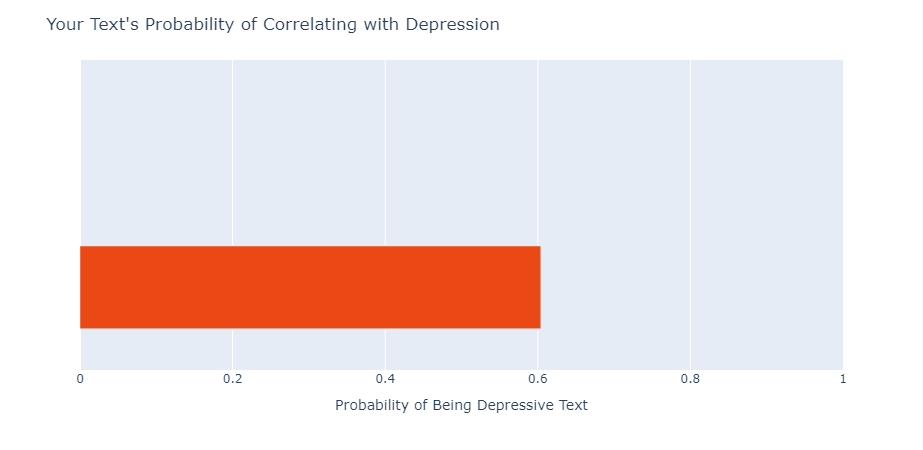

In [25]:
if prediction < 0.2:
    color='#27B240'
elif 0.2 <= prediction < 0.4:
    color='#F0D637'
elif 0.4 <= prediction < 0.6:
    color = '#F08837'
elif 0.6 <= prediction < 0.8:
    color = '#EA4915'
else:
    color = '#970000'


df = pd.DataFrame({'Probability of Being Depressive Text':prediction},index=['P'])
fig = px.bar(df, 
             y=[0.8], 
             x="Probability of Being Depressive Text", 
             orientation='h',
             range_x=[0,1],
             range_y=[0,3],
             color_discrete_sequence =[f'{color}'],
             barmode='group')
fig.update_yaxes(showticklabels=False)
fig.update_layout(title_text="Your Text's Probability of Correlating with Depression")
fig.update_yaxes(title_text='')

fig.show()

### Mood Tracker

In [33]:
day_1 = 'i am happy'
day_2 = 'today was a bad day'
day_3 = 'i am feeling depressed and tired today'
day_4 = 'I am feeling okay today'
day_5 = ''
day_6 = 'I am depressed and had suicidal thoughts'
day_7 = 'I am doing better today'

week = {1:day_1, 2:day_2, 3:day_3, 4:day_4, 5:day_5, 6:day_6, 7:day_7}

In [34]:
week.items()

dict_items([(1, 'i am happy'), (2, 'today was a bad day'), (3, 'i am feeling depressed and tired today'), (4, 'I am feeling okay today'), (5, ''), (6, 'I am depressed and had suicidal thoughts'), (7, 'I am doing better today')])

In [37]:
fig_week = px.scatter(
        range_x=[1,7], 
        range_y=[0,1],)

[1] [0.962862104177475]
[1, 2] [0.962862104177475, 0.33686375617980957]
[1, 2, 3] [0.962862104177475, 0.33686375617980957, 0.27828603982925415]
[1, 2, 3, 4] [0.962862104177475, 0.33686375617980957, 0.27828603982925415, 0.48522937297821045]
[1, 2, 3, 4, 6] [0.962862104177475, 0.33686375617980957, 0.27828603982925415, 0.48522937297821045, 0.09086555242538452]
[1, 2, 3, 4, 6, 7] [0.962862104177475, 0.33686375617980957, 0.27828603982925415, 0.48522937297821045, 0.09086555242538452, 0.809855192899704]


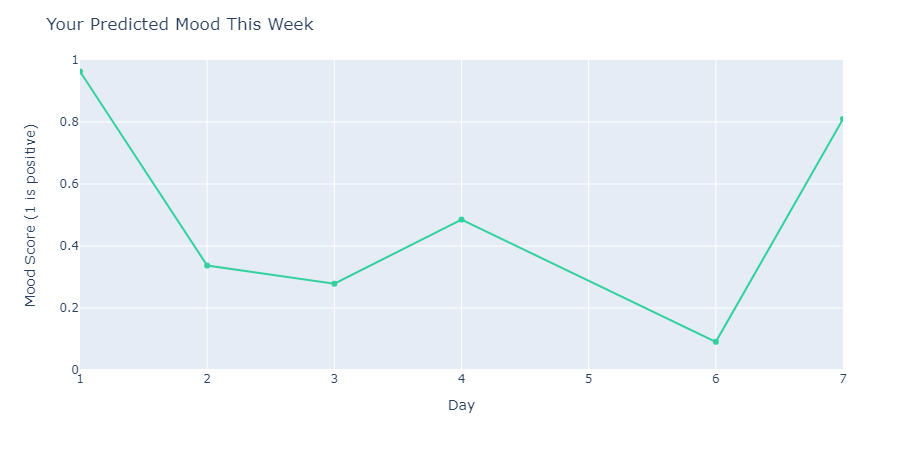

In [38]:
xs = []
ys = []
for num,day in week.items():
    if day:
        mood_score = 1 - combine_predict(day)
        xs.append(num)
        ys.append(mood_score)
        print(xs,ys)
        
fig_week.add_scatter(x=xs,y=ys,line=dict(color="#34D19F"))
fig_week.update_layout(title='Your Predicted Mood This Week')
fig_week.update_yaxes(title_text='Mood Score (1 is positive)')
fig_week.update_xaxes(title_text='Day')

In [39]:
low_prob_recs = np.array(['yes',
                          'no',
                          'maybe'])

In [41]:
np.random.choice(low_prob_recs)

'yes'